In [1]:
pip install CensusData

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 46.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for CensusData: filename=CensusData-1.15.post1-py3-none-any.whl size=28205746 sha256=9922e43905ce1cda4ee8fd2049e33a700cbe77f2ff899562068124205e7ecc00
  Stored in directory: /users/brockd/.cache/pip/wheels/54/96/84/245773d5290c5bb024ff9c3d80fc5466eefed704b4136cfe85
Successfully built CensusData
Note: you may need to restart the kernel to use updated packages.


In [223]:
import pandas as pd
import censusdata
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [224]:
sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

In [225]:
# https://api.census.gov/data/2021/acs/acs5/variables.html

demographic_variables_dict = {
    'B01003_001E' : 'Total_Population',
    'B01001_002E' : 'Total_Male_Pop',
    'B01001_026E' : 'Total_Female_Pop',
    'B01002_001E' : 'Median_Age',
    'B01002_002E' : 'M_Median_Age',
    'B01002_003E' : 'F_Median_Age',
    'B02001_002E' : 'Race_white',
    'B02001_003E' : 'Race_black',
    'B02001_004E' : 'Race_Am_Indian',
    'B02001_005E' : 'Race_Asian',
    'B02001_006E': 'Race_Pac_Isl',
    'B20004_001E':'Median_Income',
    'B20004_002E':'Less_High',
    'B20004_003E':'High_Equiv',
    'B20004_004E':'College_Assoc_Equiv',
    'B20004_005E':'Bachelors',
    'B20004_006E':'Grad_Prof',
    
    #Median Earnings by Occupation
    'B24031_002E':'Ag_For_Fish_Hunt_Mine',
    #'B24031_003E':'Ag_For_Fish_Hunt'
    #'B24031_004E':'Mine_Fish'
    'B24031_005E':'Construction',
    'B24031_006E':'Manufacturing',
    'B24031_007E':'Wholesale',
    'B24031_008E':'Retail',
    'B24031_009E':'Trans_Ware_Util',
    #'B24031_010E':'Trans_Ware'
    #'B24031_011E':'Util'
    'B24031_012E':'Information',
    'B24031_013E':'Fin_Insur_Real',
    'B24031_014E':'Fin_Insur',
    'B24031_015E':'Real_Rental',
    #'B24031_016E':'Prof_Sci_Mngmt'
    'B24031_017E':'Prof_Sci_Tech',
    'B24031_018E':'Mngmt_Enter',
    'B24031_019E':'Admin_WstMngmt',
    #'B24031_020E':'Ed_Health_Social'
    'B24031_021E':'Ed_Servc',
    'B24031_022E':'Hlthcr_Social',
    #'B24031_023E':'Arts_Entr_Rec_Fod'
    'B24031_024E':'Arts_Entr_Rec',
    'B24031_025E':'Accom_Food_Srvc',
    'B24031_026E':'Other_Servc',
    'B24031_027E':'Public_admin',
    
    
    #Civilians by Detailed Occupation
    'B24114_001E': 'Num_Total_Worker',
    'B24114_064E' : 'Num_Comp_Info_Res',
    'B24114_068E': 'Num_Soft_Dev',
    'B24114_065E': 'Num_Comp_Sys_Analyst',
    'B24114_066E': 'Num_Info_Sec_Analyst',
    'B24114_067E': 'Num_Comp_Programmer',
    'B24114_069E': 'Num_Soft_Qual',
    'B24114_070E': 'Num_Web_Dev',
    
    
    #OCCUPATION BY MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) FOR THE FULL-TIME, YEAR-ROUND CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER
    'B24021_001E' : 'Sal_Avg_Occ',
    'B24021_006E': 'Avg_Comp_EngSci',
    'B24012_003E' : 'Avg_Mngmt_Bus_Fin'
    
    
    
    
    
}

data2021 = censusdata.download('acs5', 2021, censusdata.censusgeo([('county', '*')]), 
                               # to get variable, add code to this list
                               list(demographic_variables_dict.keys()))

In [226]:
# B20004_001E is for median income by educational attainment

In [227]:
# to rename variable, add to dict
 
data2021.rename(columns=demographic_variables_dict,
                inplace=True)
data2021

,Total_Population,Total_Male_Pop,Total_Female_Pop,Median_Age,M_Median_Age,F_Median_Age,Race_white,Race_black,Race_Am_Indian,Race_Asian,...,Num_Comp_Info_Res,Num_Soft_Dev,Num_Comp_Sys_Analyst,Num_Info_Sec_Analyst,Num_Comp_Programmer,Num_Soft_Qual,Num_Web_Dev,Sal_Avg_Occ,Avg_Comp_EngSci,Avg_Mngmt_Bus_Fin
"Autauga County, Alabama: Summary level: 050, state:01> county:001",58239,28206,30033,38.5,37.9,39.2,43755,11470,98,647,...,None,None,None,None,None,None,None,45503,74403,68177
"Baldwin County, Alabama: Summary level: 050, state:01> county:003",227131,110781,116350,43.4,42.0,44.6,192034,19895,1259,2175,...,None,None,None,None,None,None,None,47905,78982,72258
"Barbour County, Alabama: Summary level: 050, state:01> county:005",25259,13361,11898,40.2,38.9,42.6,11495,11985,77,106,...,None,None,None,None,None,None,None,38734,66389,66111
"Bibb County, Alabama: Summary level: 050, state:01> county:007",22412,12300,10112,39.7,38.9,41.6,17020,5003,21,46,...,None,None,None,None,None,None,None,41795,49375,72736
"Blount County, Alabama: Summary level: 050, state:01> county:009",58884,29530,29354,41.1,39.7,42.5,54439,760,189,216,...,None,None,None,None,None,None,None,43555,62938,63518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vega Baja Municipio, Puerto Rico: Summary level: 050, state:72> county:145",54544,26057,28487,43.1,41.5,44.6,30690,2409,50,9,...,None,None,None,None,None,None,None,24484,60491,31476
"Vieques Municipio, Puerto Rico: Summary level: 050, state:72> county:147",8317,4239,4078,43.6,40.9,45.9,2592,629,0,14,...,None,None,None,None,None,None,None,16467,-666666666,-666666666
"Villalba Municipio, Puerto Rico: Summary level: 050, state:72> county:149",22341,10796,11545,42.0,40.7,42.9,10502,1784,0,0,...,None,None,None,None,None,None,None,23814,53359,21250
"Yabucoa Municipio, Puerto Rico: Summary level: 050, state:72> county:151",31047,15000,16047,44.9,43.7,46.0,3190,16119,0,11,...,None,None,None,None,None,None,None,22328,39570,35988


In [228]:
data2021 = data2021.reset_index().rename(columns = {"index":"FIPS"})

In [229]:
data2021["FIPS"] = data2021["FIPS"].apply(lambda x: x.params()[0][1] + x.params()[1][1])
data2021

,FIPS,Total_Population,Total_Male_Pop,Total_Female_Pop,Median_Age,M_Median_Age,F_Median_Age,Race_white,Race_black,Race_Am_Indian,...,Num_Comp_Info_Res,Num_Soft_Dev,Num_Comp_Sys_Analyst,Num_Info_Sec_Analyst,Num_Comp_Programmer,Num_Soft_Qual,Num_Web_Dev,Sal_Avg_Occ,Avg_Comp_EngSci,Avg_Mngmt_Bus_Fin
0,01001,58239,28206,30033,38.5,37.9,39.2,43755,11470,98,...,None,None,None,None,None,None,None,45503,74403,68177
1,01003,227131,110781,116350,43.4,42.0,44.6,192034,19895,1259,...,None,None,None,None,None,None,None,47905,78982,72258
2,01005,25259,13361,11898,40.2,38.9,42.6,11495,11985,77,...,None,None,None,None,None,None,None,38734,66389,66111
3,01007,22412,12300,10112,39.7,38.9,41.6,17020,5003,21,...,None,None,None,None,None,None,None,41795,49375,72736
4,01009,58884,29530,29354,41.1,39.7,42.5,54439,760,189,...,None,None,None,None,None,None,None,43555,62938,63518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72145,54544,26057,28487,43.1,41.5,44.6,30690,2409,50,...,None,None,None,None,None,None,None,24484,60491,31476
3217,72147,8317,4239,4078,43.6,40.9,45.9,2592,629,0,...,None,None,None,None,None,None,None,16467,-666666666,-666666666
3218,72149,22341,10796,11545,42.0,40.7,42.9,10502,1784,0,...,None,None,None,None,None,None,None,23814,53359,21250
3219,72151,31047,15000,16047,44.9,43.7,46.0,3190,16119,0,...,None,None,None,None,None,None,None,22328,39570,35988


In [230]:
data2021['FIPS'] = data2021['FIPS'].astype(float)

In [231]:
data2021[data2021 < 0] = float('nan')

In [232]:
xwalk['FIPS'] = (xwalk['fipsstatecode'] * 1000) + xwalk['fipscountycode']

KeyError: 'fipsstatecode'

In [ ]:
xwalk = pd.read_csv('cbsa2fipsxw.csv')

In [ ]:
new_data = data2021.merge(xwalk, on = 'FIPS', how = 'left')

In [ ]:
new_data.columns

In [ ]:
statesShp = geopandas.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [ ]:
xwalk = pd.read_pickle(dataFolder + "/xwalk_data_combined.pkl")
xwalk

In [ ]:
#Extract block group code
xwalk['fips'] = (xwalk['bgrp'] / 10**7).astype(int)
fipsToCbsa = xwalk.groupby('fips').first()['cbsa']
fipsToCbsa = dict(zip(fipsToCbsa.index, fipsToCbsa.values)) #Dict is faster for lookup

In [ ]:
data2021['CBSA'] = data2021['FIPS'].apply(lambda c: fipsToCbsa.get(c, 99999))
data2021

In [ ]:
dataByCbsa = data2021.groupby(by='CBSA').agg({
    'Total_Population': 'sum',
    'Total_Male_Pop': 'sum',
    'Total_Female_Pop': 'sum',
    'Median_Age': 'mean',
    'M_Median_Age': 'mean',
    'F_Median_Age': 'mean',
    'Race_white': 'sum',
    'Race_black': 'sum',
    'Race_Am_Indian': 'sum',
    'Race_Asian': 'sum',
    'Race_Pac_Isl': 'sum',
    'Median_Income': 'mean',
    'Less_High': 'sum',
    'High_Equiv': 'sum',
    'College_Assoc_Equiv': 'sum',
    'Bachelors': 'sum',
    'Grad_Prof': 'sum',
    
    #Median Earnings by Occupation
    'Ag_For_Fish_Hunt_Mine': 'mean',
    #'B24031_003E':'Ag_For_Fish_Hunt'
    #'B24031_004E':'Mine_Fish'
    'Construction': 'mean',
    'Manufacturing': 'mean',
    'Wholesale': 'mean',
    'Retail': 'mean',
    'Trans_Ware_Util': 'mean',
    #'B24031_010E':'Trans_Ware'
    #'B24031_011E':'Util'
    'Information': 'mean',
    'Fin_Insur_Real': 'mean',
    'Fin_Insur': 'mean',
    'Real_Rental': 'mean',
    #'B24031_016E':'Prof_Sci_Mngmt'
    'Prof_Sci_Tech': 'mean',
    'Mngmt_Enter': 'mean',
    'Admin_WstMngmt': 'mean',
    #'B24031_020E':'Ed_Health_Social'
    'Ed_Servc': 'mean',
    'Hlthcr_Social': 'mean',
    #'B24031_023E':'Arts_Entr_Rec_Fod'
    'Arts_Entr_Rec': 'mean',
    'Accom_Food_Srvc': 'mean',
    'Other_Servc': 'mean',
    'Public_admin': 'mean',
    
    
    #Civilians by Detailed Occupation
    'Num_Total_Worker': 'sum',
    'Num_Comp_Info_Res': 'sum',
    'Num_Soft_Dev': 'sum',
    'Num_Comp_Sys_Analyst': 'sum',
    'Num_Info_Sec_Analyst': 'sum',
    'Num_Comp_Programmer': 'sum',
    'Num_Soft_Qual': 'sum',
    'Num_Web_Dev': 'sum',
    
    
    #OCCUPATION BY MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) FOR THE FULL-TIME, YEAR-ROUND CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER
    'Sal_Avg_Occ': 'mean',
    'Avg_Comp_EngSci': 'mean',
    'Avg_Mngmt_Bus_Fin': 'mean'
})
dataByCbsa

In [ ]:
dataByCbsa.to_pickle(sharedFolder + 'ACS_data.pkl')

In [ ]:
gdf = pd.read_pickle(sharedFolder + 'gdf.pkl')
gdf

In [ ]:
merge = pd.merge(gdf, dataByCbsa, on='CBSA', how='inner')
merge

In [ ]:
# merge = merge[(merge['Median_Income'] > 0) & (merge['liminal'])]
merge['Education_Pop'] = merge['Less_High'] + merge['High_Equiv'] + merge['College_Assoc_Equiv'] + merge['Bachelors'] + merge['Grad_Prof']
merge['Less_High_pct'] = merge['Less_High'] / merge['Education_Pop']
merge['High_Equiv_pct'] = merge['High_Equiv'] / merge['Education_Pop']
merge['College_Assoc_Equiv_pct'] = merge['College_Assoc_Equiv'] / merge['Education_Pop']
merge['Bachelors_pct'] = merge['Bachelors'] / merge['Education_Pop']
merge['Grad_Prof_pct'] = merge['Grad_Prof'] / merge['Education_Pop']

merge['Bach_and_Above_pct'] = (merge['Bachelors'] + merge['Grad_Prof']) / merge['Education_Pop']

merge['Computer_Total'] = merge['Num_Total_Worker'] + merge['Num_Comp_Info_Res'] + merge['Num_Soft_Dev'] + merge['Num_Comp_Sys_Analyst'] + merge['Num_Info_Sec_Analyst'] + merge['Num_Comp_Programmer'] + merge['Num_Soft_Qual'] + merge['Num_Web_Dev']



In [ ]:
merge

In [ ]:
ax = plotUS()
merge.plot(ax=ax, column='Less_High_pct', edgecolor="black", linewidth=1, legend=True);

In [ ]:
ax = plotUS()
merge.plot(ax=ax, column='Bach_and_Above_pct', edgecolor="black", linewidth=1, legend=True);

In [ ]:
ax = plotUS()
merge.plot(ax=ax, column='Grad_Prof_pct', edgecolor="black", linewidth=1, legend=True);

In [ ]:
ax = plotUS()
merge.plot(ax=ax, column='Prof_Sci_Tech', edgecolor="black", linewidth=1, legend=True);

In [ ]:
merge['Prof_Sci_Tech'].mean()

In [233]:
merge.columns


Index(['CBSA', 'LSAD', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022',
       'NAME', 'geometry', 'metro', 'micro', 'buff', 'inBuff',
       'commuteBuffCount_19', 'workingPop_19', 'commutePercent_19',
       'commuteBuffCount_20', 'workingPop_20', 'commutePercent_20', 'liminal',
       'Total_Population', 'Total_Male_Pop', 'Total_Female_Pop', 'Median_Age',
       'M_Median_Age', 'F_Median_Age', 'Race_white', 'Race_black',
       'Race_Am_Indian', 'Race_Asian', 'Race_Pac_Isl', 'Median_Income',
       'Less_High', 'High_Equiv', 'College_Assoc_Equiv', 'Bachelors',
       'Grad_Prof', 'Ag_For_Fish_Hunt_Mine', 'Construction', 'Manufacturing',
       'Wholesale', 'Retail', 'Trans_Ware_Util', 'Information',
       'Fin_Insur_Real', 'Fin_Insur', 'Real_Rental', 'Prof_Sci_Tech',
       'Mngmt_Enter', 'Admin_WstMngmt', 'Ed_Servc', 'Hlthcr_Social',
       'Arts_Entr_Rec', 'Accom_Food_Srvc', 'Other_Servc', 'Public_admin',
       'Num_Total_Worker', 'Num_Comp_Info_Res', 'Num_Soft_Dev',
   

In [234]:
#merge = merge[merge['liminal'] == True]

In [235]:
merge[(merge['metro'] == False) & merge['liminal'] == False]['Prof_Sci_Tech'].mean()

53196.20944055501

In [236]:
merge[merge['metro']]['Prof_Sci_Tech'].mean()

68634.56676131328

In [237]:
merge[merge['micro']]['Prof_Sci_Tech'].mean()

47635.81210986267

In [238]:
merge[merge['liminal']]['Prof_Sci_Tech'].mean()

47341.88908246225

In [239]:
merge[(merge['metro'] == False) & merge['liminal'] == False]['Sal_Avg_Occ'].mean()

47247.318050405614

In [240]:
merge[merge['metro']]['Avg_Comp_EngSci'].mean()

87061.4313946773

In [241]:
merge[merge['micro']]['Avg_Comp_EngSci'].mean()

69170.48220973783

In [242]:
merge[merge['liminal']]['Avg_Comp_EngSci'].mean()

69865.21296296298

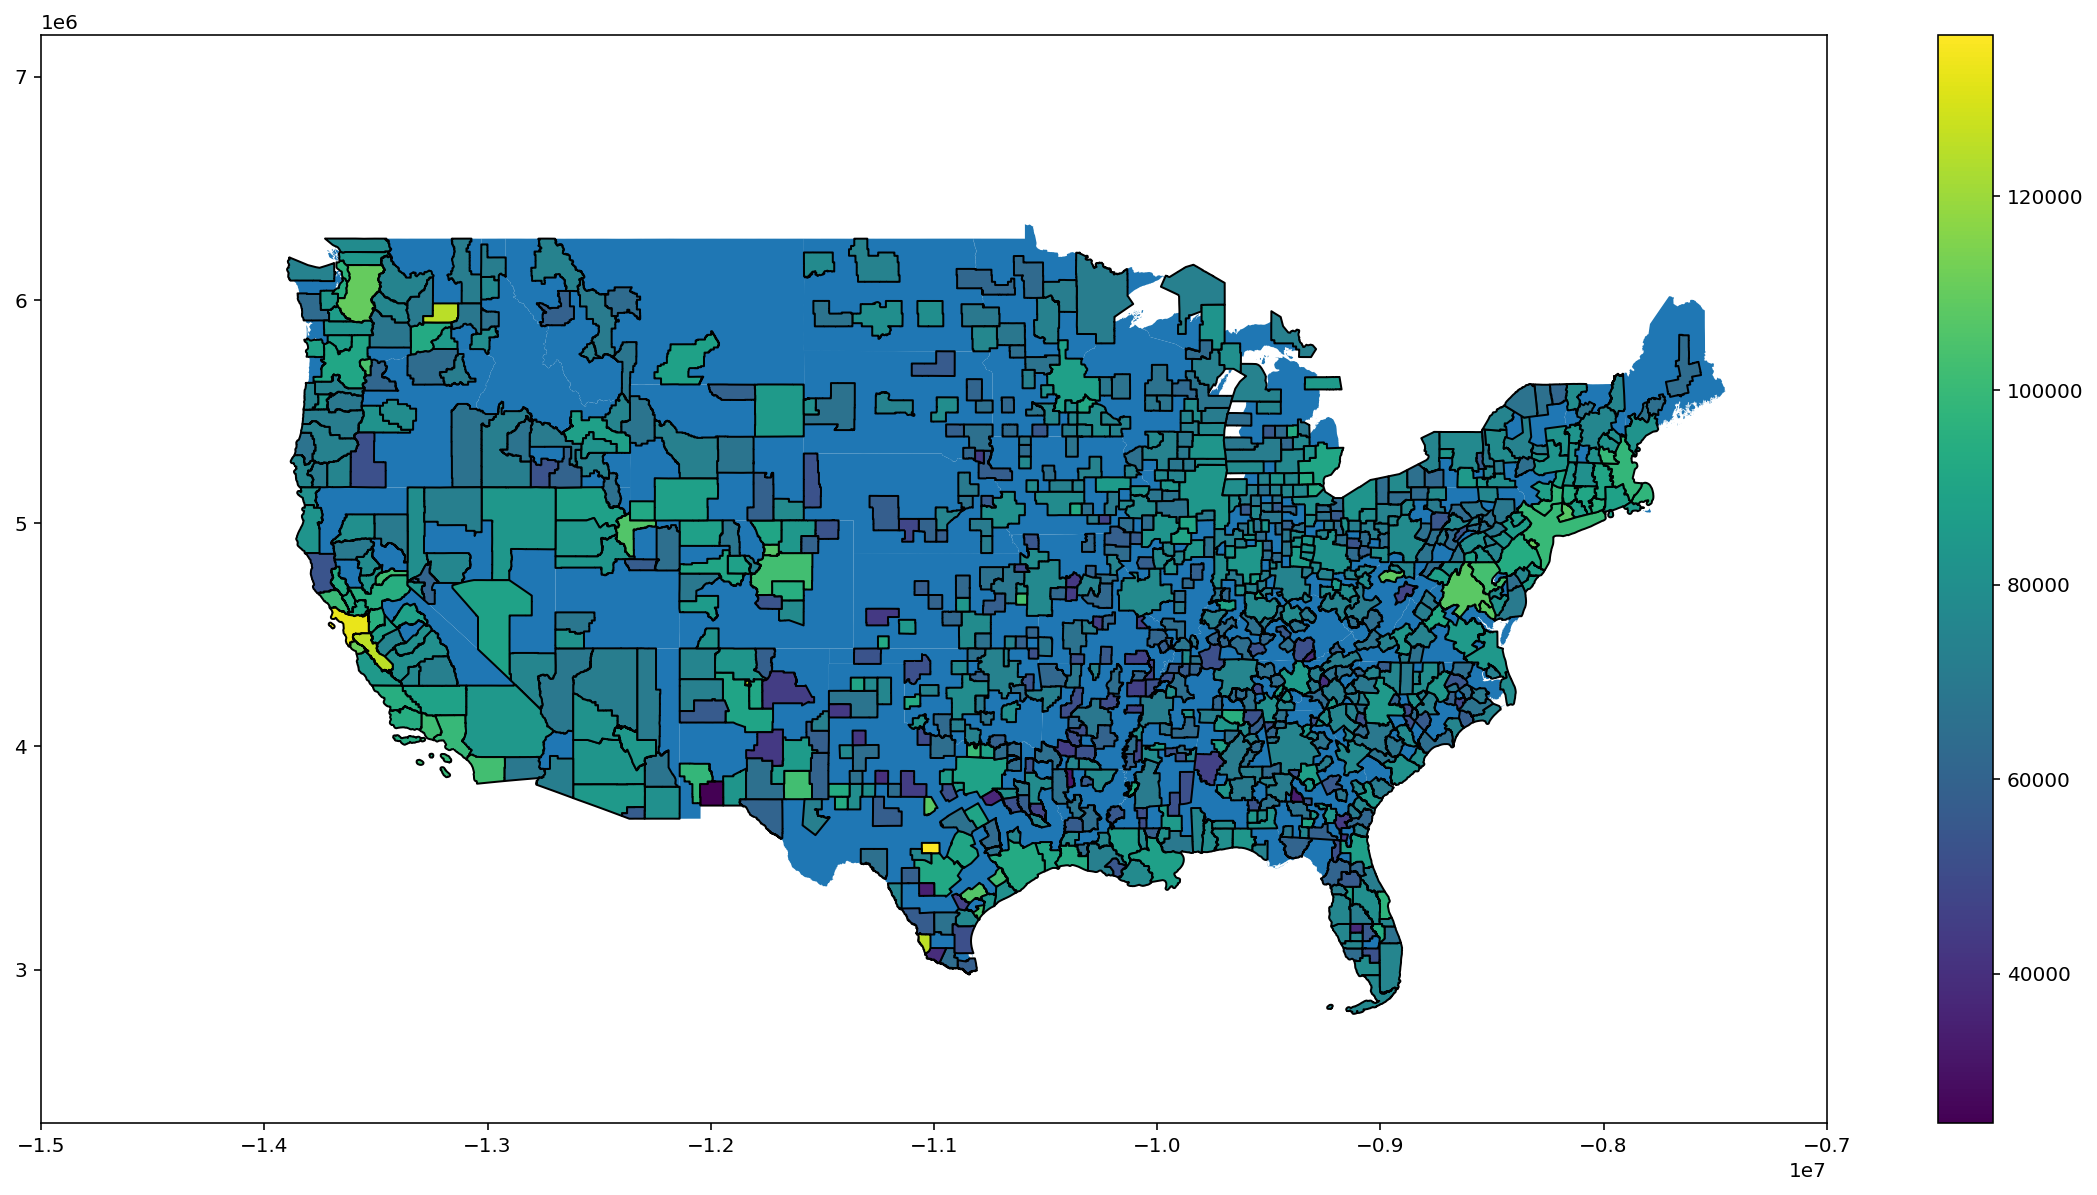

In [243]:
ax = plotUS()
merge.plot(ax=ax, column='Avg_Comp_EngSci', edgecolor="black", linewidth=1, legend=True);

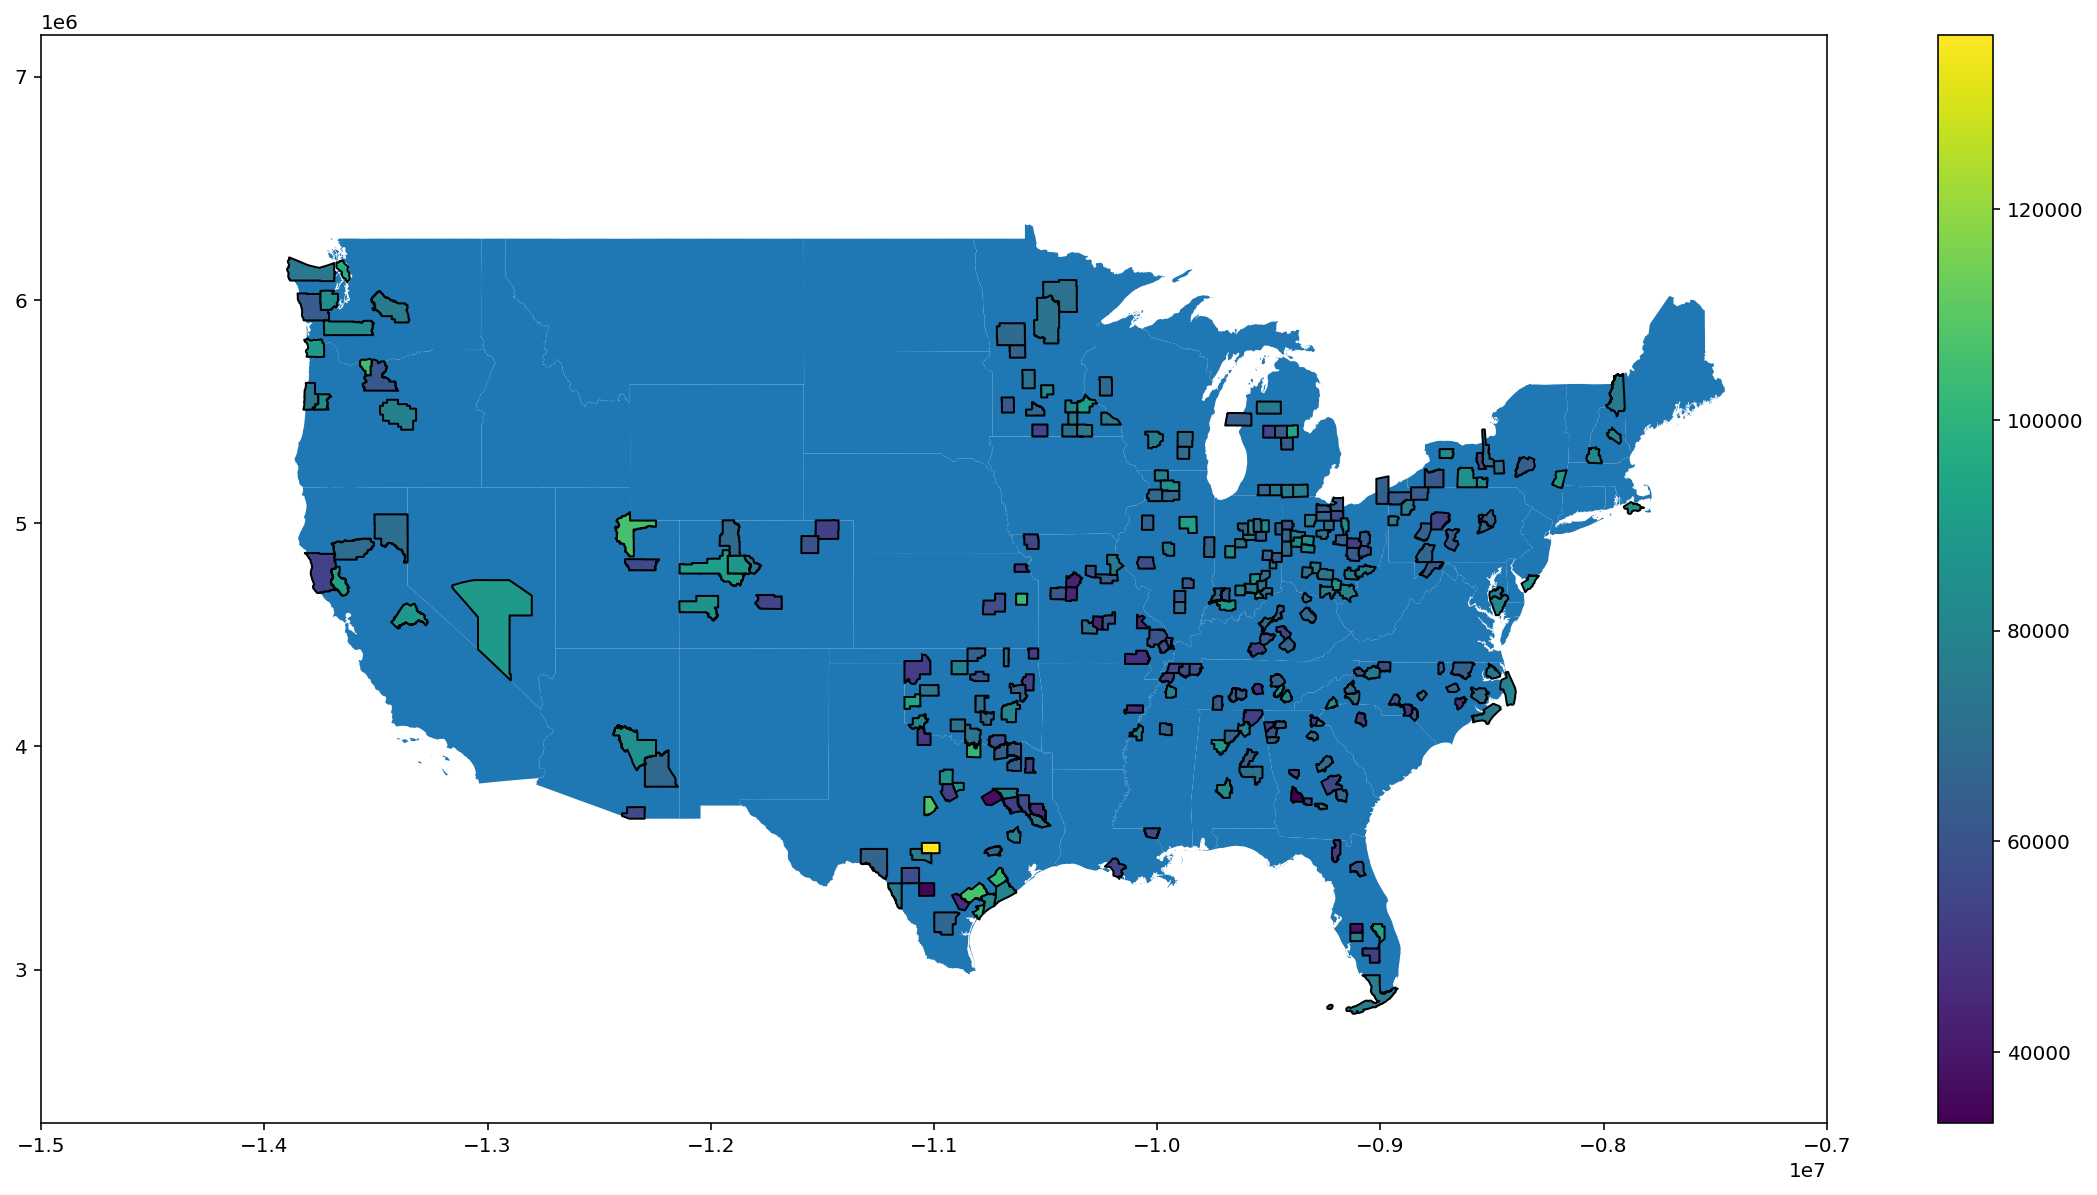

In [244]:
ax = plotUS()
merge[merge['liminal']].plot(ax=ax, column='Avg_Comp_EngSci', edgecolor="black", linewidth=1, legend=True);

In [245]:
merge[(merge['metro'] == False) & merge['liminal'] == False]['Avg_Mngmt_Bus_Fin'].mean()

65883.86725273928

In [246]:
merge[merge['metro']]['Avg_Mngmt_Bus_Fin'].mean()

79435.7940494906

In [247]:
merge[merge['micro']]['Avg_Mngmt_Bus_Fin'].mean()

61052.13075248757

In [222]:
merge[merge['liminal']]['Avg_Mngmt_Bus_Fin'].mean()

61708.2511574074